<a href="https://colab.research.google.com/github/Varshini-svg/AI-Powered-Intrusion-Detection-System-using-Deep-Learning/blob/main/AI_Powered_Network_Intrusion_Detection_System_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **AI-Powered Network Intrusion Detection System using Deep Learning**

Objective

This project is designed to implement an intelligent Network Intrusion Detection System (NIDS) that uses machine learning algorithms to detect and classify network-based cyber attacks in real time, providing good network security and resist against evolving attack vectors.   

Problem Description

Our Modern computer networks are constantly threatened by a wide range of cyber-attacks such as Denial of Service (DoS), port scanning, brute-force attacks, and data exfiltration. Traditional rule-based Intrusion Detection Systems (IDS) struggle to keep up with sophisticated, zero-day, and polymorphic attacks due to their dependency on static signatures and manual rule updates.

This project aims to overcome these limitations by integrating Artificial Intelligence (AI) and Machine Learning (ML) into the IDS pipeline. The AI-Powered NIDS will analyze network traffic patterns, learn from historical attack data, and intelligently identify abnormal or malicious behavior with minimal human intervention.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/unsw-nb15


Setting up the environment and importing the necessary libraries for both traditional ML (Random Forest, Logistic Regression) and deep learning (TensorFlow/Keras).

In [3]:
!pip install -q pandas numpy scikit-learn matplotlib seaborn tensorflow keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


This part of the code handles data loading and initial inspection and ensures
1. Training and testing datasets loaded properly
2. Feature list (from NUSW-NB15_features.csv) is loaded
3. Previewing head of the datasets

In [4]:
# Load training and testing datasets
train_df = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')

# Load the features file if needed for reference
# Use 'latin1' encoding to read the file
features_df = pd.read_csv('/kaggle/input/unsw-nb15/NUSW-NB15_features.csv', encoding='latin1')

# Preview the data
print("Training Data:")
print(train_df.head())

print("\nTesting Data:")
print(test_df.head())

print("\nFeature List:")
print(features_df.head())

Training Data:
   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2            

The below code gives the following observations

Training set size: 82,332 rows × 45 columns

Testing set size: 175,341 rows × 45 columns

Features include a mix of numerical + categorical data, with attack_cat and label as targets.



In [5]:
# Load training and testing datasets from Kaggle path
train_path = '/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv'
test_path = '/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv'

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Display shape and preview
print("Training Shape:", df_train.shape)
print("Testing Shape:", df_test.shape)
df_train.head()


Training Shape: (82332, 45)
Testing Shape: (175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


One-hot encoding process is perfectly implemented in the below code using pd.get_dummies. The resulting DataFrame shows binary columns representing the categorical values

In [6]:
import pandas as pd

# Sample initial DataFrame
df_train = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'S']
})

# Columns to one-hot encode
columns_to_encode = ['Color', 'Size']

# Perform one-hot encoding in one go
encoded_df = pd.get_dummies(df_train[columns_to_encode], prefix=columns_to_encode)

# Drop original columns if needed and merge the encoded ones
df_train = df_train.drop(columns=columns_to_encode)
df_train = pd.concat([df_train, encoded_df], axis=1)

# Optional: defragment memory if you're still seeing warnings
df_train = df_train.copy()

print(df_train)


   Color_Blue  Color_Green  Color_Red  Size_L  Size_M  Size_S
0       False        False       True   False   False    True
1       False         True      False   False    True   False
2        True        False      False    True   False   False
3       False        False       True   False   False    True


 The below code is providing the steps of training a Random Forest classifier on the UNSW-NB15 dataset using scikit-learn.

In [7]:
!pip install -q kagglehub
import kagglehub
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the training dataset
df_train = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

# Preprocessing: One-hot encoding for categorical features
categorical_features = ['proto', 'service', 'state']  # Removed 'attack_cat'
train_dummies = pd.get_dummies(df_train[categorical_features], drop_first=True)
df_train = df_train.drop(categorical_features + ['attack_cat'], axis=1)  # Dropped 'attack_cat'
df_train = pd.concat([df_train, train_dummies], axis=1)

# Assuming 'label' is your target variable
X = df_train.drop('label', axis=1)
y = df_train['label']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.9973279893119572
Confusion Matrix:
 [[7385   33]
 [  11 9038]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



Random Forest model, after hyperparameter tuning with RandomizedSearchCV, has achieved near-perfect performance with the test accuracy after randomizedSearchCV is 99.9% .It also porvides top 10 feature Importance list after tuning

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df_train = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

# Preprocessing: One-hot encoding for categorical features
categorical_features = ['proto', 'service', 'state', 'attack_cat']  # Include 'attack_cat'
train_dummies = pd.get_dummies(df_train[categorical_features], drop_first=True)
df_train = df_train.drop(categorical_features + ['attack_cat'], axis=1)  # Drop categorical columns
df_train = pd.concat([df_train, train_dummies], axis=1)

# Define features (X) and target (y)
X = df_train.drop('label', axis=1)  # Features
y = df_train['label']  # Target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42,
                               n_estimators=50,  # Reduced number of estimators
                               max_depth=10,  # Limiting the depth of the trees
                               min_samples_split=5,  # Increased minimum samples for splits
                               min_samples_leaf=3,  # Increased minimum samples for leaves
                               max_features='sqrt')  # Reduced features for each split
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Feature Importance
importances = model.feature_importances_
feature_names = model.feature_names_in_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top 10 important features
print("Top 10 Feature Importances:\n", importance_df.head(10))

# Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],  # More restrictive depths for tuning
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 3],
    'max_features': ['sqrt', 'log2']
}

# RandomizedSearchCV with a subset of the data for faster results
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search
random_search.fit(X_train_subset, y_train_subset)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
print("Test Accuracy after RandomizedSearchCV:", accuracy_score(y_test, y_pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test, zero_division=1))

# Feature Importance after tuning
importances_tuned = best_model.feature_importances_
importance_df_tuned = pd.DataFrame({'Feature': feature_names, 'Importance': importances_tuned})
importance_df_tuned = importance_df_tuned.sort_values(by='Importance', ascending=False)

# Print top 10 important features after tuning
print("Top 10 Feature Importances after Tuning:\n", importance_df_tuned.head(10))


Accuracy: 1.0
Confusion Matrix:
 [[7418    0]
 [   0 9049]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467

Top 10 Feature Importances:
                  Feature  Importance
193    attack_cat_Normal    0.229815
0                     id    0.102557
7                   sttl    0.056432
5                 dbytes    0.036189
190  attack_cat_Exploits    0.032926
6                   rate    0.030614
4                 sbytes    0.027616
9                  sload    0.027437
11                 sloss    0.025929
24                 smean    0.025920
Test Accuracy after RandomizedSearchCV: 0.9999392724843627
Test Confusion Matrix:
 [[7417    1]
 [   0 9049]]
Test Classification Report:
               

Agter Optuna finishes tuning, we will get:

Best hyperparameters from the 50 trials

Test set accuracy, confusion matrix, and classification report

Top 10 most important features from the final tuned model

In [16]:
!pip install optuna
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np # Added import for np

# Load the dataset
df_train = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

# Preprocessing: One-hot encoding for categorical features
categorical_features = ['proto', 'service', 'state', 'attack_cat']  # Include 'attack_cat'
train_dummies = pd.get_dummies(df_train[categorical_features], drop_first=True)
df_train = df_train.drop(categorical_features + ['attack_cat'], axis=1)  # Drop categorical columns
df_train = pd.concat([df_train, train_dummies], axis=1)

# Define features (X) and target (y)
X = df_train.drop('label', axis=1)  # Features
y = df_train['label']  # Target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function for Optuna
def objective(trial):
    # Hyperparameter search space for RandomForestClassifier
    param_dist = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    # Create the RandomForestClassifier with the suggested hyperparameters
    model = RandomForestClassifier(**param_dist, random_state=42)

    # Stratified KFold cross-validation
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    accuracy_scores = []

    # Accessing X_train and y_train from the outer scope
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)
        accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))

    # Return the mean cross-validation accuracy as the objective
    return np.mean(accuracy_scores)

# Optuna study creation and optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # 50 trials for hyperparameter optimization

# Get the best hyperparameters from Optuna
best_params = study.best_params
print("Best Hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the top 10 feature importances
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Top 10 Feature Importances:")
print(importance_df.head(10))

[I 2025-05-14 16:17:05,743] A new study created in memory with name: no-name-cf7d256e-dcef-40ba-a7f0-077d9df654d5
[I 2025-05-14 16:17:25,889] Trial 0 finished with value: 0.9999544522887724 and parameters: {'n_estimators': 98, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.9999544522887724.
[I 2025-05-14 16:17:36,708] Trial 1 finished with value: 0.9999544522887724 and parameters: {'n_estimators': 87, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.9999544522887724.
[I 2025-05-14 16:18:00,470] Trial 2 finished with value: 0.9999544522887724 and parameters: {'n_estimators': 135, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.9999544522887724.
[I 2025-05-14 16:18:13,685] Trial 3 finished with value: 1.0 and parameters

Best Hyperparameters:  {'n_estimators': 77, 'max_depth': 26, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
Accuracy: 1.0
Confusion Matrix:
 [[7418    0]
 [   0 9049]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467

Top 10 Feature Importances:
                 Feature  Importance
193    attack_cat_Normal    0.272966
0                     id    0.116140
7                   sttl    0.046175
190  attack_cat_Exploits    0.032925
6                   rate    0.028147
5                 dbytes    0.025926
32      ct_dst_sport_ltm    0.025852
191   attack_cat_Fuzzers    0.025419
8                   dttl    0.024253
4                 sbytes    0.023780


In [17]:
# 4. Analyze Feature Importance
importances = best_model.feature_importances_
# Get feature names from the model instead of X_train
feature_names = best_model.feature_names_in_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df.head(10)) # Print top 10 features

Feature Importances:
                  Feature  Importance
193    attack_cat_Normal    0.272966
0                     id    0.116140
7                   sttl    0.046175
190  attack_cat_Exploits    0.032925
6                   rate    0.028147
5                 dbytes    0.025926
32      ct_dst_sport_ltm    0.025852
191   attack_cat_Fuzzers    0.025419
8                   dttl    0.024253
4                 sbytes    0.023780


The below code will remove the leaky features, perform correlation analysis and can also be visualised by us.

Columns in df_train_encoded: Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload',
       ...
       'state_RST', 'attack_cat_Backdoor', 'attack_cat_DoS',
       'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Generic',
       'attack_cat_Normal', 'attack_cat_Reconnaissance',
       'attack_cat_Shellcode', 'attack_cat_Worms'],
      dtype='object', length=198)
Feature Correlations with 'label' (after removing leaky features):
 service_dns            0.363961
attack_cat_Exploits    0.357228
ct_src_dport_ltm       0.341513
rate                   0.328629
ct_state_ttl           0.318517
                         ...   
stcpb                 -0.281428
dtcpb                 -0.282860
state_CON             -0.306349
state_FIN             -0.317398
id                    -0.387489
Length: 189, dtype: float64


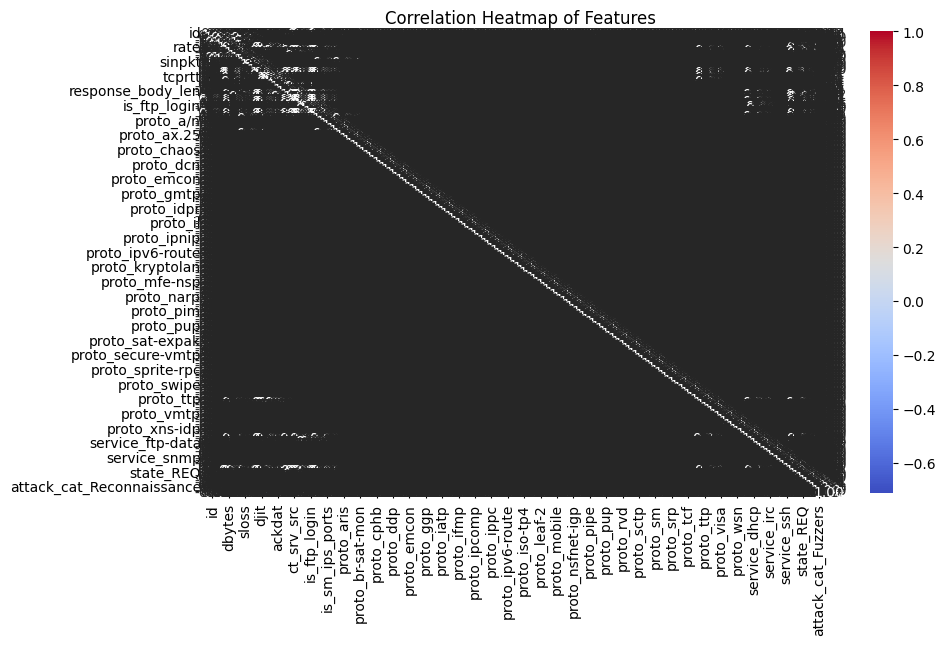

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Load the dataset (if not already loaded)
df_train = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

# Assuming df_train is your original DataFrame before encoding
# and you want to encode 'proto', 'service', 'state', 'attack_cat'
categorical_features = ['proto', 'service', 'state', 'attack_cat']
df_train_encoded = pd.get_dummies(df_train, columns=categorical_features, drop_first=True)


# Check columns in the encoded DataFrame
print("Columns in df_train_encoded:", df_train_encoded.columns)

# Remove leaky features
features_to_remove = ['attack_cat_Generic', 'attack_cat_Normal', 'state_INT', 'sttl', 'ct_dst_sport_ltm', 'dwin', 'swin', 'proto_tcp']
X = df_train_encoded.drop(['label'] + features_to_remove, axis=1)  # Drop target and leaky features
y = df_train_encoded['label']

# Perform correlation analysis
correlations = X.corrwith(y).sort_values(ascending=False)
print("Feature Correlations with 'label' (after removing leaky features):\n", correlations)

# Optional: Visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [20]:
# Set a correlation threshold (can be adjusted based on your dataset and model)
correlation_threshold = 0.1

# Select features with absolute correlation above the threshold
selected_features = correlations[abs(correlations) > correlation_threshold].index

# Update X to include only the selected features
X_selected = X[selected_features]

# Print the selected features to verify
print("Selected Features based on Correlation Threshold:\n", selected_features)




Selected Features based on Correlation Threshold:
 Index(['service_dns', 'attack_cat_Exploits', 'ct_src_dport_ltm', 'rate',
       'ct_state_ttl', 'ct_srv_dst', 'ct_srv_src', 'ct_dst_src_ltm',
       'ct_src_ltm', 'proto_udp', 'ct_dst_ltm', 'attack_cat_Fuzzers',
       'attack_cat_DoS', 'proto_unas', 'attack_cat_Reconnaissance', 'sload',
       'is_sm_ips_ports', 'ackdat', 'sinpkt', 'proto_arp', 'state_REQ',
       'tcprtt', 'synack', 'dmean', 'dload', 'stcpb', 'dtcpb', 'state_CON',
       'state_FIN', 'id'],
      dtype='object')


The below code is giving the accuracy of the model as 99.97% after the selected features.


 Accuracy using Selected Features: 0.9997

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7400
           1       1.00      1.00      1.00      9067

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



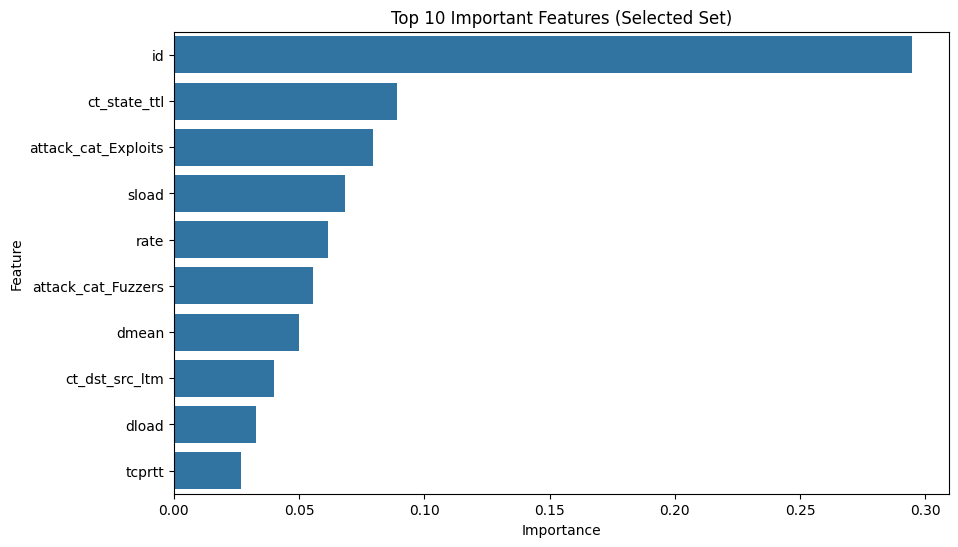

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Split data
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 2. Train Random Forest (you can replace with best_model if needed)
model_sel = RandomForestClassifier(n_estimators=100, random_state=42)
model_sel.fit(X_train_sel, y_train_sel)

# 3. Predict and evaluate
y_pred_sel = model_sel.predict(X_test_sel)

accuracy_sel = accuracy_score(y_test_sel, y_pred_sel)
print(f"\n Accuracy using Selected Features: {accuracy_sel:.4f}")
print("\n Classification Report:")
print(classification_report(y_test_sel, y_pred_sel))

importances_sel = model_sel.feature_importances_
importance_df_sel = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': importances_sel
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_sel.head(10))
plt.title("Top 10 Important Features (Selected Set)")
plt.show()


From the code below we get the confusion matrix and ROC plot

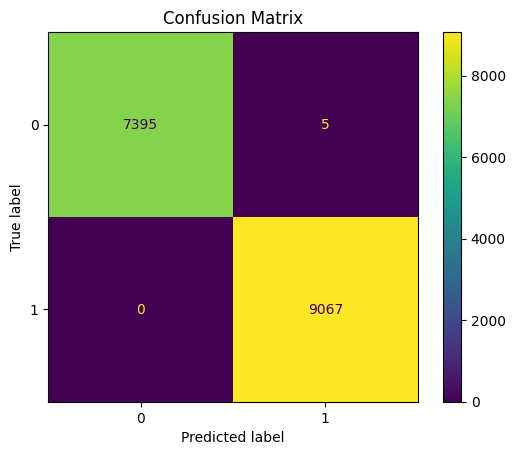

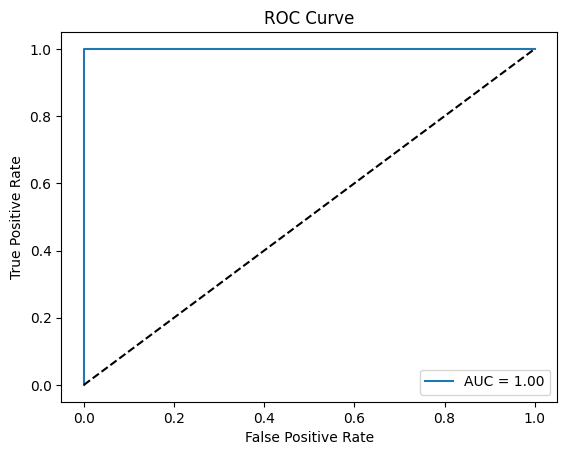

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Confusion Matrix
cm = confusion_matrix(y_test_sel, y_pred_sel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve (optional)
y_prob = model_sel.predict_proba(X_test_sel)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_sel, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_sel, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
